# Linear Regression Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv('datasets/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Explor Dataset

In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
x_features= list(df.columns.values.tolist())[:-1]
print ("The dataset has the following Features:", x_features )

The dataset has the following Features: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


### Plotting dataset

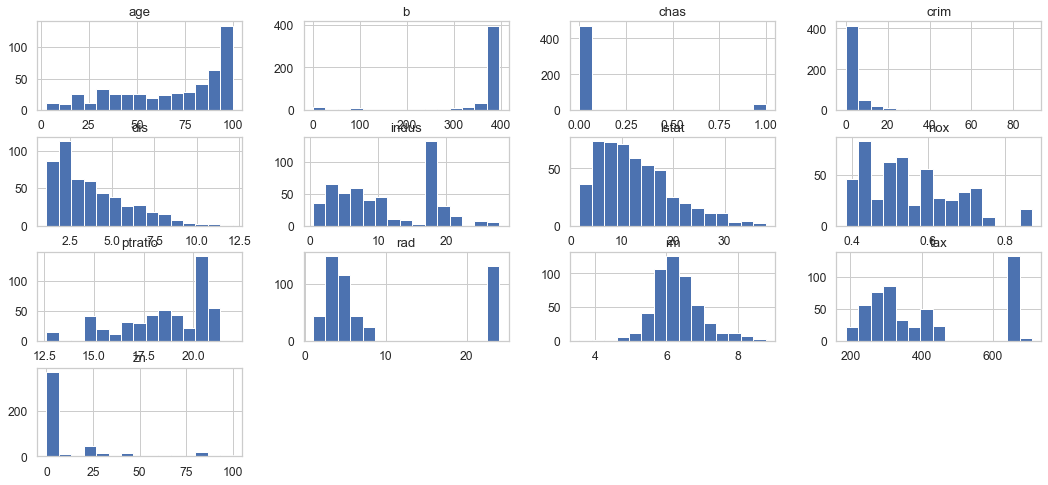

In [6]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [9, 6]})
df[x_features].hist(bins=15, figsize=(18, 8), layout=(4, 4))
plt.show()

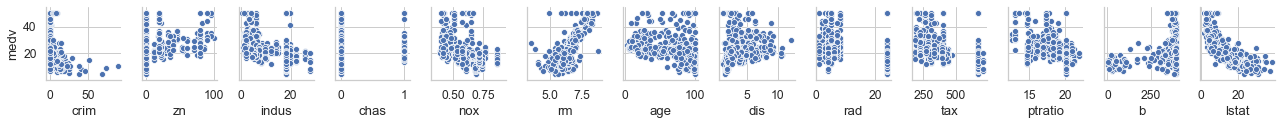

In [7]:
sns.pairplot(df,x_vars=x_features,height=2, aspect=0.7,y_vars='medv' )
plt.show()

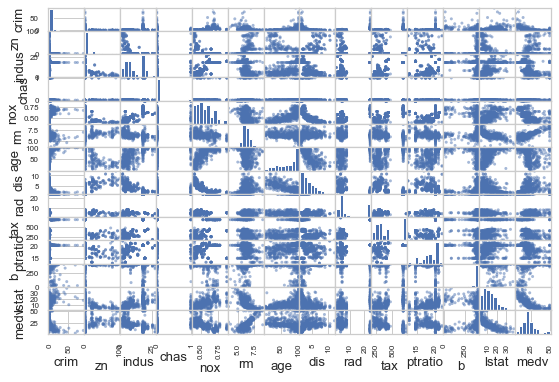

In [8]:
scatter_matrix(df)
plt.show()

### Split Dataset

In [9]:
X = df[x_features]
y = df["medv"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Traning and Testing

In [10]:
lm = linear_model.LinearRegression()

In [11]:
lm.fit(X_train,y_train)
y_prime=lm.predict(X_test)

### Performance

In [12]:
# report the most significiant features
print(lm.coef_)
print(list(zip(x_features, lm.coef_)))

[-1.19139697e-01  4.76307169e-02  3.11385581e-03  2.51765094e+00
 -1.65965017e+01  3.66544866e+00 -1.13971582e-02 -1.58813261e+00
  2.52228398e-01 -1.08619777e-02 -1.04804097e+00  6.18082895e-03
 -5.19802805e-01]
[('crim', -0.11913969735442788), ('zn', 0.047630716934931955), ('indus', 0.0031138558082555974), ('chas', 2.5176509383324386), ('nox', -16.59650166320521), ('rm', 3.665448658893855), ('age', -0.011397158210482615), ('dis', -1.5881326124743904), ('rad', 0.25222839753949094), ('tax', -0.010861977689355791), ('ptratio', -1.0480409698008022), ('b', 0.006180828953704003), ('lstat', -0.5198028054576465)]


In [13]:
# calculate mean squred error
print("The performance of the model: {}".format(mean_squared_error(y_test, y_prime)))

The performance of the model: 26.558581842040706


### Plot Training Data

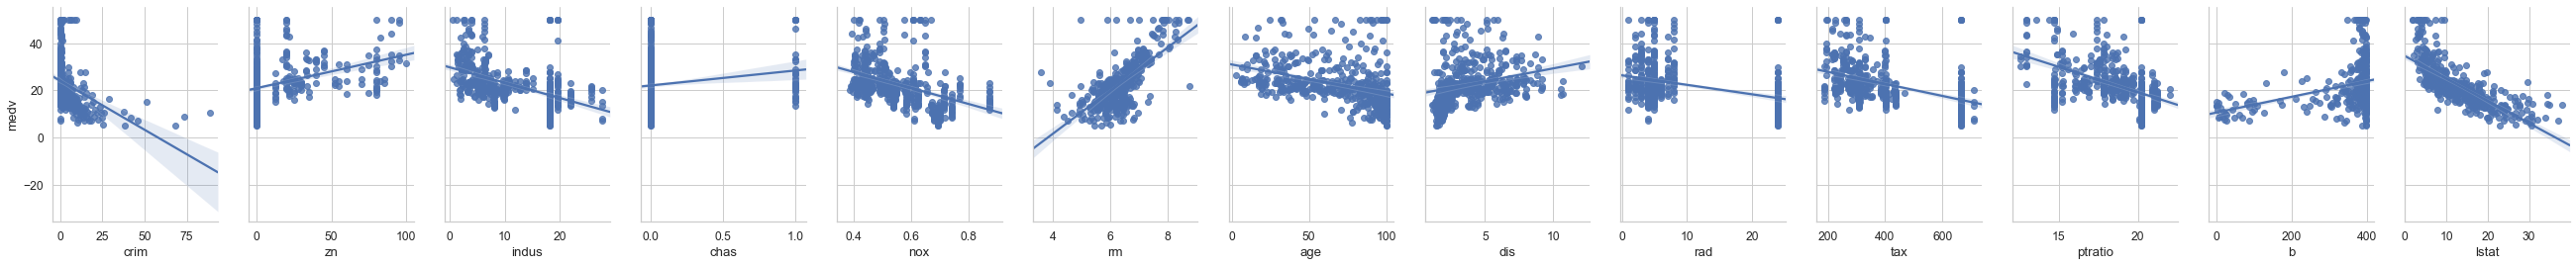

In [14]:
sns.pairplot(df, x_vars=x_features,y_vars='medv',height=4, aspect=0.7, kind='reg')
plt.show()